In [18]:
import pickle

results_dir = 'results/'

alibaba_data_gpu = pickle.load(open(f"{results_dir}/result_alibaba_streaming_GPU.pkl", "rb"))
alibaba_data_cpu = pickle.load(open(f"{results_dir}/result_alibaba_streaming_CPU.pkl", "rb"))

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import os

# === Config ===
fig_dir = 'figures'
os.makedirs(fig_dir, exist_ok=True)

# Style for EuroSys/ACM format (slightly smaller than text body)
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 9,
    'axes.labelsize': 9,
    'axes.titlesize': 9,
    'xtick.labelsize': 8,
    'ytick.labelsize': 8,
    'legend.fontsize': 7,
    'text.usetex': False,
    'figure.dpi': 300,
    'savefig.dpi': 300,
    'savefig.bbox': 'tight'
})

# === Constants ===
FIGSIZE = (3.3, 2.0)
COLOR_GPU = '#1f77b4'
COLOR_CPU = '#ff7f0e'

# === Extract metrics ===
edge_addition_time_cpu = alibaba_data_cpu['edge_addition_time']
walk_sampling_time_cpu = alibaba_data_cpu['walk_sampling_time']
total_edges_cpu = alibaba_data_cpu['total_edges']

edge_addition_time_gpu = alibaba_data_gpu['edge_addition_time']
walk_sampling_time_gpu = alibaba_data_gpu['walk_sampling_time']
total_edges_gpu = alibaba_data_gpu['total_edges']

# Time axis (convert to billions directly for x-axis)
steps = range(1, len(edge_addition_time_gpu) + 1)
edges_gpu_b = np.array(total_edges_gpu) / 1e9
edges_cpu_b = np.array(total_edges_cpu) / 1e9

# === CUMULATIVE CALCULATIONS ===
cumulative_edge_time_gpu = np.cumsum(edge_addition_time_gpu) / 3600  # Convert to hours
cumulative_edge_time_cpu = np.cumsum(edge_addition_time_cpu) / 3600
cumulative_walk_time_gpu = np.cumsum(walk_sampling_time_gpu) / 3600
cumulative_walk_time_cpu = np.cumsum(walk_sampling_time_cpu) / 3600

# === Helper functions ===
def create_clean_axis(ax):
    ax.grid(True, alpha=0.3, linewidth=0.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(0.8)
    ax.spines['bottom'].set_linewidth(0.8)
    ax.tick_params(direction='out', length=3, width=0.8)

# === Plot 1: Cumulative Edge Addition Time ===
fig1, ax1 = plt.subplots(figsize=FIGSIZE)

ax1.plot(edges_gpu_b, cumulative_edge_time_gpu, marker='o', markevery=20, markersize=2,
         linestyle='-', color=COLOR_GPU, linewidth=1.0, label='GPU')
ax1.plot(edges_cpu_b, cumulative_edge_time_cpu, marker='s', markevery=20, markersize=2,
         linestyle='-', color=COLOR_CPU, linewidth=1.0, label='CPU')

ax1.set_xlabel("Total Edges Added (Billions)")
ax1.set_ylabel("Cumulative Time (hours)")
ax1.legend(loc='upper left', frameon=True, fancybox=False, edgecolor='black')
create_clean_axis(ax1)

plt.tight_layout()
plt.savefig(f'{fig_dir}/plot_5_alibaba_edge_addition_performance.pdf')
plt.savefig(f'{fig_dir}/plot_5_alibaba_edge_addition_performance.png')
plt.close()

# === Plot 2: Cumulative Walk Sampling Time ===
fig2, ax2 = plt.subplots(figsize=FIGSIZE)

ax2.plot(edges_gpu_b, cumulative_walk_time_gpu, marker='o', markevery=20, markersize=2,
         linestyle='-', color=COLOR_GPU, linewidth=1.0, label='GPU')
ax2.plot(edges_cpu_b, cumulative_walk_time_cpu, marker='s', markevery=20, markersize=2,
         linestyle='-', color=COLOR_CPU, linewidth=1.0, label='CPU')

ax2.set_xlabel("Total Edges Added (Billions)")
ax2.set_ylabel("Cumulative Time (hours)")
ax2.legend(loc='upper left', frameon=True, fancybox=False, edgecolor='black')
create_clean_axis(ax2)

plt.tight_layout()
plt.savefig(f'{fig_dir}/plot_5_alibaba_walk_sampling_performance.pdf')
plt.savefig(f'{fig_dir}/plot_5_alibaba_walk_sampling_performance.png')
plt.close()

print("✅ Saved streamlined cumulative Alibaba performance figures")

✅ Saved streamlined cumulative Alibaba performance figures


In [20]:
import numpy as np
import matplotlib.pyplot as plt
import os

# === Config ===
fig_dir = 'figures'
os.makedirs(fig_dir, exist_ok=True)

# Style for very compact figures (1.8 x 1.4 inches)
plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['Times', 'Times New Roman', 'DejaVu Serif'],
    'font.size': 9,
    'axes.labelsize': 9,
    'axes.titlesize': 9,
    'xtick.labelsize': 8,
    'ytick.labelsize': 8,
    'legend.fontsize': 8,
    'text.usetex': False,
    'figure.dpi': 300,
    'savefig.dpi': 300,
    'savefig.bbox': 'tight',
    'axes.linewidth': 0.6,
    'xtick.major.width': 0.6,
    'ytick.major.width': 0.6,
    'lines.linewidth': 1.2,
    'lines.markersize': 1.5,
    'legend.handlelength': 1.2,
    'legend.handletextpad': 0.4,
    'legend.columnspacing': 0.8
})

# === Constants ===
FIGSIZE = (1.8, 1.4)  # Very compact size
COLOR_GPU = '#1f77b4'
COLOR_CPU = '#ff7f0e'

# === Extract metrics ===
edge_addition_time_cpu = alibaba_data_cpu['edge_addition_time']
walk_sampling_time_cpu = alibaba_data_cpu['walk_sampling_time']
total_edges_cpu = alibaba_data_cpu['total_edges']

edge_addition_time_gpu = alibaba_data_gpu['edge_addition_time']
walk_sampling_time_gpu = alibaba_data_gpu['walk_sampling_time']
total_edges_gpu = alibaba_data_gpu['total_edges']

# Time axis (convert to billions directly for x-axis)
steps = range(1, len(edge_addition_time_gpu) + 1)
edges_gpu_b = np.array(total_edges_gpu) / 1e9
edges_cpu_b = np.array(total_edges_cpu) / 1e9

# === CUMULATIVE CALCULATIONS ===
cumulative_edge_time_gpu = np.cumsum(edge_addition_time_gpu) / 3600  # Convert to hours
cumulative_edge_time_cpu = np.cumsum(edge_addition_time_cpu) / 3600
cumulative_walk_time_gpu = np.cumsum(walk_sampling_time_gpu) / 3600
cumulative_walk_time_cpu = np.cumsum(walk_sampling_time_cpu) / 3600

# === Helper functions ===
def create_clean_axis(ax):
    ax.grid(True, alpha=0.25, linewidth=0.4)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(0.6)
    ax.spines['bottom'].set_linewidth(0.6)
    ax.tick_params(direction='out', length=2, width=0.6, pad=2)

    # Reduce number of ticks for compact display
    ax.locator_params(nbins=4)

# === Plot 1: Cumulative Edge Addition Time ===
fig1, ax1 = plt.subplots(figsize=FIGSIZE)

ax1.plot(edges_gpu_b, cumulative_edge_time_gpu, marker='o', markevery=25, markersize=1.5,
         linestyle='-', color=COLOR_GPU, linewidth=1.2, label='GPU')
ax1.plot(edges_cpu_b, cumulative_edge_time_cpu, marker='s', markevery=25, markersize=1.5,
         linestyle='-', color=COLOR_CPU, linewidth=1.2, label='CPU')

ax1.set_xlabel("Total Edges Added (Billions)")
ax1.set_ylabel("Total Time (hours)")

# Compact legend positioning
ax1.legend(loc='upper left', frameon=True, fancybox=False, edgecolor='black',
          framealpha=0.9, borderpad=0.3)

create_clean_axis(ax1)

# Adjust margins for compact display
plt.subplots_adjust(left=0.15, bottom=0.18, right=0.95, top=0.95)
plt.savefig(f'{fig_dir}/plot_5_alibaba_edge_addition_performance_compact.pdf',
           bbox_inches='tight', pad_inches=0.02)
plt.savefig(f'{fig_dir}/plot_5_alibaba_edge_addition_performance_compact.png',
           bbox_inches='tight', pad_inches=0.02)
plt.close()

# === Plot 2: Cumulative Walk Sampling Time ===
fig2, ax2 = plt.subplots(figsize=FIGSIZE)

ax2.plot(edges_gpu_b, cumulative_walk_time_gpu, marker='o', markevery=25, markersize=1.5,
         linestyle='-', color=COLOR_GPU, linewidth=1.2, label='GPU')
ax2.plot(edges_cpu_b, cumulative_walk_time_cpu, marker='s', markevery=25, markersize=1.5,
         linestyle='-', color=COLOR_CPU, linewidth=1.2, label='CPU')

ax2.set_xlabel("Total Edges Added (Billions)")
ax2.set_ylabel("Total Time (hours)")

# Compact legend positioning
ax2.legend(loc='upper left', frameon=True, fancybox=False, edgecolor='black',
          framealpha=0.9, borderpad=0.3)

create_clean_axis(ax2)

# Adjust margins for compact display
plt.subplots_adjust(left=0.15, bottom=0.18, right=0.95, top=0.95)
plt.savefig(f'{fig_dir}/plot_5_alibaba_walk_sampling_performance_compact.pdf',
           bbox_inches='tight', pad_inches=0.02)
plt.savefig(f'{fig_dir}/plot_5_alibaba_walk_sampling_performance_compact.png',
           bbox_inches='tight', pad_inches=0.02)
plt.close()

print("✅ Saved ultra-compact cumulative Alibaba performance figures (1.8 x 1.4 inches)")

✅ Saved ultra-compact cumulative Alibaba performance figures (1.8 x 1.4 inches)


In [21]:
import pickle
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import os

# Load results
with open('results/memory_benchmarking.pickle', 'rb') as f:
    results = pickle.load(f)

# Setup
os.makedirs('figures', exist_ok=True)

# Simple font config
plt.rcParams.update({
    'font.size': 9,
    'figure.dpi': 600,
    'savefig.dpi': 600,
    'savefig.bbox': 'tight'
})

# Plot configuration
configs = ['directed_with_weights', 'directed_without_weights',
           'undirected_with_weights', 'undirected_without_weights']
config_labels = ['Directed (w/ weights)', 'Directed (w/o weights)',
                 'Undirected (w/ weights)', 'Undirected (w/o weights)']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
markers = ['o', 's', '^', 'D']

def setup_axis(ax, use_logx=True):
    """Clean axis setup with automatic ticks and minimum 3 x-axis ticks"""
    ax.grid(True, alpha=0.3)

    # Remove top and right spines (box lines)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Force at least 3 y-axis ticks
    ax.yaxis.set_major_locator(ticker.MaxNLocator(nbins=5, min_n_ticks=3))

    if use_logx:
        ax.set_xscale('log')
    else:
        # Ensure minimum 3 x-axis ticks for linear scale
        ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=5, min_n_ticks=3))

def plot_memory(prefix, filename, xlabel, use_logx=True):
    """Plot memory usage"""
    fig, ax = plt.subplots(figsize=(1.8, 1.4))

    for i, config in enumerate(configs):
        key = f"{prefix}_{config}"
        if key not in results:
            continue

        data = results[key]
        x = list(data.keys())
        y = [v / 1024 for v in data.values()]  # Convert MB to GB

        ax.plot(x, y, color=colors[i], marker=markers[i],
                linewidth=1, markersize=2.5, label=config_labels[i])

    setup_axis(ax, use_logx)
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Memory (GB)')

    plt.tight_layout()
    fig.savefig(f'figures/{filename}.pdf')
    fig.savefig(f'figures/{filename}.png')
    plt.close()

def plot_streaming_window():
    """Plot streaming window memory usage"""
    fig, ax = plt.subplots(figsize=(1.8, 1.4))

    for i, config in enumerate(configs):
        key = f"streaming_window_{config}"
        if key not in results:
            continue

        y = [v / 1024 for v in results[key]]
        x = list(range(1, len(y) + 1))

        ax.plot(x, y, color=colors[i], marker=markers[i],
                linewidth=1, markersize=1, label=config_labels[i])

    # Use setup_axis with linear scale (use_logx=False) to ensure minimum 3 x-axis ticks
    setup_axis(ax, use_logx=False)

    # Set manual y-ticks as requested
    ax.set_yticks([0.05, 0.06, 0.07, 0.08])
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))

    ax.set_xlabel("Batch Number")
    ax.set_ylabel('Memory (GB)')

    plt.tight_layout()
    fig.savefig('figures/plot_7_memory_memory_streaming_window.pdf')
    fig.savefig('figures/plot_7_memory_memory_streaming_window.png')
    plt.close()

def create_legend():
    """Create standalone legend"""
    fig, ax = plt.subplots(figsize=(2.2, 0.3))
    ax.axis('off')

    # Create legend elements
    handles = [plt.Line2D([0], [0], marker=markers[i], color=colors[i],
                         markersize=4, linewidth=1, label=config_labels[i])
               for i in range(len(configs))]

    legend = ax.legend(handles=handles, loc='center', ncol=2,
                      frameon=True, edgecolor='black')

    plt.tight_layout()
    fig.savefig("figures/plot_7_memory_memory_legend.pdf", bbox_inches='tight')
    fig.savefig("figures/plot_7_memory_memory_legend.png", bbox_inches='tight')
    plt.close()

# Generate all plots
plot_memory("increasing_edges", "plot_7_memory_memory_vs_edges", "Edge Count")
plot_memory("increasing_nodes", "plot_7_memory_memory_vs_nodes", "Node Count")
plot_memory("increasing_timestamps", "plot_7_memory_memory_vs_timestamps", "TS Count")
plot_streaming_window()
create_legend()

print("All memory plots generated with log x-axis and minimum 3 x-axis ticks")

All memory plots generated with log x-axis and minimum 3 x-axis ticks


/var/folders/c2/qpqbktpj54d0pqlh56rzx0lm0000gn/T/ipykernel_93693/1208682927.py:114: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


In [22]:
import numpy as np


def human_format(x, pos):
    if x >= 1_000_000:
        return f'{x/1_000_000:.1f}M'.rstrip('0').rstrip('.')
    elif x >= 1_000:
        return f'{x/1_000:.0f}K'
    else:
        return str(int(x))

def compute_mean_std(data):
    data = np.array(data)
    return data.mean(axis=1), data.std(axis=1)

In [23]:
import pickle

results_dir = 'results/'

# Load the benchmark results
def load_results():
    cpu_results = {
        "edges": pickle.load(open(f"{results_dir}/result_edges_CPU.pkl", "rb")),
        "walks": pickle.load(open(f"{results_dir}/result_walks_CPU.pkl", "rb")),
        "max_walk_lens": pickle.load(open(f"{results_dir}/result_max_walk_lens_CPU.pkl", "rb")),
        "incremental": pickle.load(open(f"{results_dir}/result_incremental_sliding_CPU.pkl", "rb"))
    }

    gpu_results = {
        "edges": pickle.load(open(f"{results_dir}/result_edges_GPU.pkl", "rb")),
        "walks": pickle.load(open(f"{results_dir}/result_walks_GPU.pkl", "rb")),
        "max_walk_lens": pickle.load(open(f"{results_dir}/result_max_walk_lens_GPU.pkl", "rb")),
        "incremental": pickle.load(open(f"{results_dir}/result_incremental_sliding_GPU.pkl", "rb"))
    }

    raphtory_results = {
        "edges": pickle.load(open(f"{results_dir}/result_edges_raphtory.pkl", "rb")),
        "incremental": pickle.load(open(f"{results_dir}/result_incremental_raphtory.pkl", "rb"))
    }

    return cpu_results, gpu_results, raphtory_results

# Define edge and walk counts from the benchmark
edge_counts = [
    1_000,      # 1K
    5_000,      # 5K
    10_000,     # 10K
    50_000,     # 50K
    100_000,    # 100K
    500_000,    # 500K
    1_000_000,  # 1M
    5_000_000,  # 5M
    10_000_000, # 10M
    50_000_000, # 50M
    100_000_000,# 100M
    200_000_000,# 200M
    301_183_000 # Full dataset
]


walk_counts = [
    10_000, 50_000, 100_000, 200_000, 500_000,
    1_000_000, 2_000_000, 5_000_000, 10_000_000
]

walk_lengths = list(range(10, 310, 10))

# Load results
cpu_results, gpu_results, raphtory_results = load_results()

In [24]:
with open("results/stellargraph_results.pkl", "rb") as f:
    stellargraph_results = pickle.load(f)

In [58]:
def load_new_results():
    trw_raphtory_results = pickle.load(
        open(f"{results_dir}/results_trw_raphtory_with_tn2v.pkl", "rb")
    )
    stellargraph_results = pickle.load(
        open(f"{results_dir}/results_stellargraph_edge_additions.pickle", "rb")
    )

    # --------------------------------------------------
    # Edge addition (old keys preserved)
    # --------------------------------------------------
    edge_addition_results = {
        # Existing keys (unchanged)
        'trw_gpu_with_weights': trw_raphtory_results['edge_ingest_gpu_weight'],
        'trw_gpu_without_weights': trw_raphtory_results['edge_ingest_gpu_index'],
        'trw_cpu_with_weights': trw_raphtory_results['edge_ingest_cpu_weight'],
        'trw_cpu_without_weights': trw_raphtory_results['edge_ingest_cpu_index'],
        'raphtory': trw_raphtory_results['raphtory_edge_ingest'],
        'stellargraph': stellargraph_results['stellargraph_edge_addition'],
        'trw_gpu_tn2v': trw_raphtory_results['edge_ingest_gpu_tn2v'],
        'trw_cpu_tn2v': trw_raphtory_results['edge_ingest_cpu_tn2v']
    }

    # --------------------------------------------------
    # Walk sampling (old keys preserved)
    # --------------------------------------------------
    walk_sampling_results = {
        # Existing keys (unchanged)
        'gpu_weight_based': trw_raphtory_results['walk_sampling_gpu_weight'],
        'gpu_index_based': trw_raphtory_results['walk_sampling_gpu_index'],
        'cpu_weight_based': trw_raphtory_results['walk_sampling_cpu_weight'],
        'cpu_index_based': trw_raphtory_results['walk_sampling_cpu_index'],
        'gpu_tn2v': trw_raphtory_results['walk_sampling_gpu_tn2v'],
        'cpu_tn2v': trw_raphtory_results['walk_sampling_cpu_tn2v']
    }

    return edge_addition_results, walk_sampling_results


In [26]:
edge_addition_results, walk_sampling_results = load_new_results()

In [28]:
import matplotlib.pyplot as plt
import os

# Ensure figures directory exists
os.makedirs('figures', exist_ok=True)

# Font and style configuration for EuroSys
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 9,
    'axes.labelsize': 10,
    'axes.titlesize': 10,
    'xtick.labelsize': 8,
    'ytick.labelsize': 8,
    'legend.fontsize': 8,
    'text.usetex': False,
    'figure.dpi': 300,
    'savefig.dpi': 300,
    'savefig.bbox': 'tight'
})

# Academic color scheme
colors = {
    'cpu_no_weights': 'orange',
    'cpu_weights': 'darkorange',
    'gpu_no_weights': 'blue',
    'gpu_weights': 'darkblue',
    'raphtory': 'green',
    'stellargraph': 'teal'
}

# Load new data
edge_addition_results, walk_sampling_results = load_new_results()

# Compute means and stds from new results
cpu_mean_wo, cpu_std_wo = compute_mean_std(edge_addition_results['trw_cpu_without_weights'])
cpu_mean_w, cpu_std_w = compute_mean_std(edge_addition_results['trw_cpu_with_weights'])
gpu_mean_wo, gpu_std_wo = compute_mean_std(edge_addition_results['trw_gpu_without_weights'])
gpu_mean_w, gpu_std_w = compute_mean_std(edge_addition_results['trw_gpu_with_weights'])
raphtory_mean, raphtory_std = compute_mean_std(edge_addition_results['raphtory'])
stellargraph_mean, stellargraph_std = compute_mean_std(edge_addition_results['stellargraph'])

# Clean axis formatting
def create_clean_axis(ax):
    ax.grid(True, alpha=0.3, linewidth=0.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(0.8)
    ax.spines['bottom'].set_linewidth(0.8)
    ax.tick_params(direction='out', length=3, width=0.8)

# === Create Plot ===
fig, ax = plt.subplots(1, 1, figsize=(3.3, 1.5))  # ~Single-column width

# Plot error bars
ax.errorbar(edge_counts, cpu_mean_wo, yerr=cpu_std_wo,
             fmt='o-', color=colors['cpu_no_weights'], label="CPU (w/o Weights)",
             markersize=3, linewidth=1.2, capsize=2, markeredgewidth=0.5)

ax.errorbar(edge_counts, cpu_mean_w, yerr=cpu_std_w,
             fmt='s--', color=colors['cpu_weights'], label="CPU (w/ Weights)",
             markersize=3, linewidth=1.2, capsize=2, markeredgewidth=0.5)

ax.errorbar(edge_counts, gpu_mean_wo, yerr=gpu_std_wo,
             fmt='o-', color=colors['gpu_no_weights'], label="GPU (w/o Weights)",
             markersize=3, linewidth=1.2, capsize=2, markeredgewidth=0.5)

ax.errorbar(edge_counts, gpu_mean_w, yerr=gpu_std_w,
             fmt='s--', color=colors['gpu_weights'], label="GPU (w/ Weights)",
             markersize=3, linewidth=1.2, capsize=2, markeredgewidth=0.5)

ax.errorbar(edge_counts, raphtory_mean, yerr=raphtory_std,
             fmt='d-', color=colors['raphtory'], label="Raphtory",
             markersize=3, linewidth=1.2, capsize=2, markeredgewidth=0.5)

# X-axis: evenly distributed ticks for edge_counts spanning 1K to 301M
xticks = [10_000_000, 50_000_000, 100_000_000, 150_000_000, 200_000_000, 250_000_000, 301_183_000]
xtick_labels = ['10M', '50M', '100M', '150M', '200M', '250M', '301M']
ax.set_xticks(xticks)
ax.set_xticklabels(xtick_labels)

# Labels
ax.set_xlabel("Number of Edges")
ax.set_ylabel("Time (seconds)")
create_clean_axis(ax)

# Add legend inside the plot
ax.legend(loc='upper left', frameon=True, edgecolor='black')

# Save
plt.savefig('figures/plot_2_incremental_edge_addition_absolute.pdf')
plt.savefig('figures/plot_2_incremental_edge_addition_absolute.png')
plt.close()

print("✅ Saved figure:")
print("- figures/plot_2_incremental_edge_addition_absolute.pdf/png")

✅ Saved figure:
- figures/plot_2_incremental_edge_addition_absolute.pdf/png


In [75]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import ticker
import os

# Ensure figures directory exists
os.makedirs('figures', exist_ok=True)

# Configure fonts for EuroSys-style paper
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 9,
    'axes.labelsize': 10,
    'axes.titlesize': 10,
    'xtick.labelsize': 8,
    'ytick.labelsize': 8,
    'legend.fontsize': 8,
    'text.usetex': False,
    'figure.dpi': 300,
    'savefig.dpi': 300,
    'savefig.bbox': 'tight'
})

# Color mapping
colors = {
    'cpu_index': 'orange',
    'cpu_weight': 'darkorange',
    'gpu_index': 'blue',
    'gpu_weight': 'darkblue'
}

# Format large tick labels
def human_format(x, pos=None):
    if x >= 1_000_000:
        return f'{x/1_000_000:.0f}M'
    elif x >= 1_000:
        return f'{x/1_000:.0f}K'
    else:
        return str(int(x))

# Style helper
def create_clean_axis(ax):
    ax.grid(True, alpha=0.3, linewidth=0.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(0.8)
    ax.spines['bottom'].set_linewidth(0.8)
    ax.tick_params(direction='out', length=3, width=0.8)

cpu_mean_index, cpu_std_index = compute_mean_std(cpu_results["walks"]["walk_sampling_time_index_based"])
cpu_mean_weight, cpu_std_weight = compute_mean_std(cpu_results["walks"]["walk_sampling_time_weight_based"])
gpu_mean_index, gpu_std_index = compute_mean_std(gpu_results["walks"]["walk_sampling_time_index_based"])
gpu_mean_weight, gpu_std_weight = compute_mean_std(gpu_results["walks"]["walk_sampling_time_weight_based"])

# === Plot: Absolute Runtime ===
fig, ax = plt.subplots(1, 1, figsize=(3.3, 2.0))

ax.errorbar(walk_counts, cpu_mean_index, yerr=cpu_std_index,
             fmt='o-', color=colors['cpu_index'], label="CPU (Index Based)",
             markersize=3, linewidth=1.2, capsize=2, markeredgewidth=0.5)

ax.errorbar(walk_counts, cpu_mean_weight, yerr=cpu_std_weight,
             fmt='s--', color=colors['cpu_weight'], label="CPU (Weight Based)",
             markersize=3, linewidth=1.2, capsize=2, markeredgewidth=0.5)

ax.errorbar(walk_counts, gpu_mean_weight, yerr=gpu_std_weight,
             fmt='s--', color=colors['gpu_weight'], label="GPU (Weight Based)",
             markersize=3, linewidth=1.2, capsize=2, markeredgewidth=0.5)

ax.errorbar(walk_counts, gpu_mean_index, yerr=gpu_std_index,
             fmt='o-', color=colors['gpu_index'], label="GPU (Index Based)",
             markersize=3, linewidth=1.2, capsize=2, markeredgewidth=0.5)

ax.errorbar(walk_counts, gpu_mean_weight, yerr=gpu_std_weight,
             fmt='s--', color=colors['gpu_weight'], label="GPU (Weight Based)",
             markersize=3, linewidth=1.2, capsize=2, markeredgewidth=0.5)

# Format X-axis
xticks = [50_000, 1_000_000, 3_000_000, 5_000_000, 7_000_000, 10_000_000]
xtick_labels = ['50K', '1M', '3M', '5M', '7M', '10M']

ax.set_xticks(xticks)
ax.set_xticklabels(xtick_labels)

ax.set_xlabel("Number of Walks")
ax.set_ylabel("Time (seconds)")
create_clean_axis(ax)

# Add legend inside the plot
ax.legend(loc='upper left', frameon=True, edgecolor='black')

plt.tight_layout()
plt.savefig('figures/plot_3_incremental_walk_sampling_absolute.pdf')
plt.savefig('figures/plot_3_incremental_walk_sampling_absolute.png')
plt.close()

print("✅ Saved walk sampling plot:")
print("- figures/plot_3_incremental_walk_sampling_absolute.pdf/png")

✅ Saved walk sampling plot:
- figures/plot_3_incremental_walk_sampling_absolute.pdf/png


In [76]:
import matplotlib.pyplot as plt
import numpy as np
import os

# Ensure figures directory exists
os.makedirs('figures', exist_ok=True)

# Configure fonts and style for academic paper - EuroSys format
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 11,
    'axes.labelsize': 12,
    'axes.titlesize': 13,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
    'text.usetex': False,
    'figure.dpi': 300,
    'savefig.dpi': 300,
    'savefig.bbox': 'tight'
})

# Academic color scheme - matching your original colors
colors = {
    'cpu': 'orange',
    'gpu': 'blue',
    'ratio': 'teal'
}

# Compute mean and std for each walk length (assuming compute_mean_std function exists)
cpu_mean, cpu_std = compute_mean_std(cpu_results["max_walk_lens"]["walk_sampling_time"])
gpu_mean, gpu_std = compute_mean_std(gpu_results["max_walk_lens"]["walk_sampling_time"])

# Compute ratios and propagated error
ratios = cpu_mean / gpu_mean
ratios_std = ratios * np.sqrt((cpu_std / cpu_mean) ** 2 + (gpu_std / gpu_mean) ** 2)

def create_clean_axis(ax):
    """Apply consistent styling to axis"""
    ax.grid(True, alpha=0.3, linewidth=0.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(0.8)
    ax.spines['bottom'].set_linewidth(0.8)
    ax.tick_params(direction='out', length=3, width=0.8)

# Figure 1: Walk Length Absolute Performance
fig1, ax1 = plt.subplots(1, 1, figsize=(6, 4))

ax1.errorbar(walk_lengths, cpu_mean, yerr=cpu_std,
             fmt='o-', color=colors['cpu'], label="CPU",
             markersize=4, linewidth=1.5, capsize=3, markeredgewidth=0.5)

ax1.errorbar(walk_lengths, gpu_mean, yerr=gpu_std,
             fmt='o-', color=colors['gpu'], label="GPU",
             markersize=4, linewidth=1.5, capsize=3, markeredgewidth=0.5)

ax1.set_xlabel("Maximum Walk Length")
ax1.set_ylabel("Time (seconds)")
create_clean_axis(ax1)

# Add legend inside the plot
legend1 = ax1.legend(loc='upper left', frameon=True, fancybox=False, edgecolor='black', fontsize=10)
legend1.get_frame().set_linewidth(0.8)

plt.tight_layout()
plt.savefig('figures/plot_4_incremental_walk_length_absolute.pdf', format='pdf', bbox_inches='tight')
plt.savefig('figures/plot_4_incremental_walk_length_absolute.png', format='png', bbox_inches='tight')
plt.close()

# Figure 2: Walk Length Performance Ratios
fig2, ax2 = plt.subplots(1, 1, figsize=(6, 4))

ax2.errorbar(walk_lengths, ratios, yerr=ratios_std,
             fmt='o-', color=colors['ratio'], label='CPU / GPU',
             markersize=4, linewidth=1.5, capsize=3, markeredgewidth=0.5)

# Add horizontal lines for reference
ax2.axhline(y=1, color='black', linestyle=':', alpha=0.7, linewidth=1.5)

# Add mean ratio line
mean_ratio = np.mean(ratios)
ax2.axhline(y=mean_ratio, color='red', linestyle='--', alpha=0.8, linewidth=2,
            label=f'Mean Ratio: {mean_ratio:.1f}×')

ax2.set_xlabel("Maximum Walk Length")
ax2.set_ylabel("Time Ratio")
create_clean_axis(ax2)

# Add legend inside the plot
legend2 = ax2.legend(loc='upper left', frameon=True, fancybox=False, edgecolor='black', fontsize=10)
legend2.get_frame().set_linewidth(0.8)

plt.tight_layout()
plt.savefig('figures/plot_4_incremental_walk_length_ratios.pdf', format='pdf', bbox_inches='tight')
plt.savefig('figures/plot_4_incremental_walk_length_ratios.png', format='png', bbox_inches='tight')
plt.close()

print("Created separate walk length figures (no titles, legends inside):")
print("- plot_4_walk_length_absolute.pdf")
print("- plot_4_walk_length_ratios.pdf")
print("\nAll figures saved in figures/ directory")
print("Note: Titles removed, legends kept inside plots")

Created separate walk length figures (no titles, legends inside):
- plot_4_walk_length_absolute.pdf
- plot_4_walk_length_ratios.pdf

All figures saved in figures/ directory
Note: Titles removed, legends kept inside plots


In [77]:
def generate_bell_curve_temporal_graph(n_nodes=1000, n_edges=1_000_000, seed=42, time_range=1_000_000):
    np.random.seed(seed)

    # Bell-curve over node indices (higher probability for middle nodes)
    node_probs = np.exp(-0.5 * ((np.arange(n_nodes) - n_nodes / 2) / (n_nodes / 6)) ** 2)
    node_probs /= node_probs.sum()

    sources = np.random.choice(n_nodes, size=n_edges, p=node_probs)
    targets = np.random.choice(n_nodes, size=n_edges, p=node_probs)

    # Remove self-loops
    mask = sources != targets
    sources = sources[mask]
    targets = targets[mask]

    # Assign random timestamps in range [0, time_range)
    timestamps = np.random.randint(0, high=time_range, size=len(sources))

    return sources, targets, timestamps

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from temporal_random_walk import TemporalRandomWalk
import os

# Ensure figures directory exists
os.makedirs('figures', exist_ok=True)

# Configure fonts and style for academic paper - EuroSys format
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 9,
    'axes.labelsize': 10,
    'axes.titlesize': 10,
    'xtick.labelsize': 9,
    'ytick.labelsize': 9,
    'legend.fontsize': 9,
    'text.usetex': False,
    'figure.dpi': 300,
    'savefig.dpi': 300,
    'savefig.bbox': 'tight'
})

def run_walk_sampling(edge_picker, sources, targets, timestamps, n_nodes=1000):
    trw = TemporalRandomWalk(
        is_directed=False,
        use_gpu=False,
        max_time_capacity=-1,
        enable_weight_computation=True
    )
    trw.add_multiple_edges(sources, targets, timestamps)

    walks, _, walk_lengths = trw.get_random_walks_and_times(
        max_walk_len=100,
        walk_bias=edge_picker,
        num_walks_total=1_000_000,
        initial_edge_bias="Uniform",
        walk_direction="Forward_In_Time"
    )

    avg_walk_length = walk_lengths.mean()
    print(f"{edge_picker} → Avg walk length: {avg_walk_length:.2f}")

    edge_node_counts = np.zeros(n_nodes)
    for node in np.concatenate([sources, targets]):
        edge_node_counts[node] += 1

    valid_steps = walks[walks != -1]
    walk_node_counts = np.zeros(n_nodes)
    for node in valid_steps:
        walk_node_counts[node] += 1

    edge_node_counts /= edge_node_counts.max()
    walk_node_counts /= walk_node_counts.max()

    return edge_node_counts, walk_node_counts, avg_walk_length

def create_clean_axis(ax):
    """Apply consistent styling to axis"""
    ax.grid(True, alpha=0.3, linewidth=0.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(0.8)
    ax.spines['bottom'].set_linewidth(0.8)
    ax.tick_params(direction='out', length=3, width=0.8)

def plot_individual_distributions(results, n_nodes=1000):
    """Create optimized walk distribution plots for publication."""
    pickers = ["ExponentialIndex", "LinearIndex", "Uniform"]
    colors = ['#1f77b4', '#ff7f0e']  # Blue, Orange

    xticks = np.linspace(0, n_nodes - 1, 5, dtype=int)
    yticks = np.linspace(0, 1, 4)

    for i, (edge_counts, walk_counts, avg_walk_length) in enumerate(results):
        fig, ax = plt.subplots(figsize=(2.5, 1.6))

        ax.plot(np.arange(n_nodes), edge_counts,
                linewidth=1.5, color=colors[0], label='Edge Participation')
        ax.plot(np.arange(n_nodes), walk_counts,
                linewidth=1.5, color=colors[1], label='Walk Visit Count')

        ax.set_xlabel("Node ID", fontsize=10)
        ax.set_ylabel("Normalized Freq", fontsize=10)
        ax.set_xticks(xticks)
        ax.set_yticks(yticks)
        create_clean_axis(ax)

        plt.tight_layout()

        filename = f"plot_6_walk_distribution_{pickers[i].lower()}"
        plt.savefig(f'figures/{filename}.pdf', format='pdf')
        plt.savefig(f'figures/{filename}.png', format='png')
        plt.close()

        print(f"✅ Saved {filename}")

def create_walk_distribution_legend():
    """Create standalone legend for walk distribution figures"""
    fig_legend = plt.figure(figsize=(5, 0.5))

    # Academic color scheme
    colors = ['#1f77b4', '#ff7f0e']  # Blue, Orange

    # Create legend elements
    legend_elements = [
        plt.Line2D([0], [0], color=colors[0], linewidth=2,
                   label='Edge Participation', markeredgewidth=0.5),
        plt.Line2D([0], [0], color=colors[1], linewidth=2,
                   label='Walk Visit Count', markeredgewidth=0.5)
    ]

    # Create legend directly on figure with tight parameters
    legend = fig_legend.legend(handles=legend_elements,
                              loc='center',
                              ncol=2,
                              frameon=True,
                              fancybox=False,
                              edgecolor='black',
                              columnspacing=1.2,
                              handletextpad=0.4,
                              handlelength=1.8,
                              borderpad=0.2,
                              labelspacing=0.3)

    legend.get_frame().set_linewidth(0.8)

    # Get exact bounding box and save with minimal whitespace
    bbox = legend.get_window_extent(fig_legend.canvas.get_renderer())
    bbox_inches = bbox.transformed(fig_legend.dpi_scale_trans.inverted())

    plt.savefig('figures/plot_6_walk_distribution_legend.pdf', format='pdf',
               bbox_inches=bbox_inches, pad_inches=0.02)
    plt.savefig('figures/plot_6_walk_distribution_legend.png', format='png',
               bbox_inches=bbox_inches, pad_inches=0.02)
    plt.close()

    print("Saved standalone legend")

def run_bell_curve_walk_distribution_experiment():
    """Run the walk distribution experiment with separated figure output"""
    print("Generating graph...")
    sources, targets, timestamps = generate_bell_curve_temporal_graph()
    pickers = ["ExponentialIndex", "Linear", "Uniform"]
    results = []

    for picker in pickers:
        edge_counts, walk_counts, avg_walk_length = run_walk_sampling(
            picker, sources, targets, timestamps)
        results.append((edge_counts, walk_counts, avg_walk_length))

    # Create individual figures for each picker strategy
    plot_individual_distributions(results)

    # Create standalone legend
    create_walk_distribution_legend()

    print("Created separated walk distribution figures:")
    print("- plot_6_walk_distribution_exponentialindex.pdf")
    print("- plot_6_walk_distribution_linearindex.pdf")
    print("- plot_6_walk_distribution_uniform.pdf")
    print("- plot_6_walk_distribution_legend.pdf (standalone legend)")
    print("\nAll figures saved in figures/ directory")
    print("Note: Titles and legends removed from individual figures")

run_bell_curve_walk_distribution_experiment()

Generating graph...
ExponentialIndex → Avg walk length: 96.33
Linear → Avg walk length: 15.28
Uniform → Avg walk length: 9.96
✅ Saved plot_6_walk_distribution_exponentialindex
✅ Saved plot_6_walk_distribution_linearindex
✅ Saved plot_6_walk_distribution_uniform
Saved standalone legend
Created separated walk distribution figures:
- plot_6_walk_distribution_exponentialindex.pdf
- plot_6_walk_distribution_linearindex.pdf
- plot_6_walk_distribution_uniform.pdf
- plot_6_walk_distribution_legend.pdf (standalone legend)

All figures saved in figures/ directory
Note: Titles and legends removed from individual figures


In [58]:
from temporal_random_walk import LinearRandomPicker, ExponentialIndexRandomPicker, UniformRandomPicker

N_TRIALS = 100_000
HI = 20

def test_pickers(picker, prioritize_end, hi, n_trials=N_TRIALS):
    counts = [0] * hi

    for _ in range(n_trials):
        picked_num = picker.pick_random(0, hi, prioritize_end)
        counts[picked_num] += 1

    return counts


counts_linear_end_prioritized = test_pickers(LinearRandomPicker(), True, hi=HI)
counts_linear_start_prioritized = test_pickers(LinearRandomPicker(), False, hi=HI)

counts_exp_end_prioritized = test_pickers(ExponentialIndexRandomPicker(), True, hi=HI)
counts_exp_start_prioritized = test_pickers(ExponentialIndexRandomPicker(), False, hi=HI)

counts_uniform_end_prioritized = test_pickers(UniformRandomPicker(), True, hi=HI)
counts_uniform_start_prioritized = test_pickers(UniformRandomPicker(), False, hi=HI)

In [59]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import os

# Ensure figures directory exists
os.makedirs('figures', exist_ok=True)

# Configure fonts and style for academic paper - EuroSys format
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 11,
    'axes.labelsize': 12,
    'axes.titlesize': 13,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
    'text.usetex': False,
    'figure.dpi': 300,
    'savefig.dpi': 300,
    'savefig.bbox': 'tight'
})

def create_clean_axis(ax):
    """Apply consistent styling to axis"""
    ax.grid(True, alpha=0.3, linewidth=0.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(0.8)
    ax.spines['bottom'].set_linewidth(0.8)
    ax.tick_params(direction='out', length=3, width=0.8)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))

def create_picker_validation_figures():
    """Create individual figures for each picker validation test"""

    plot_data = [
        ("exponential_end", "Exponential (End Prioritized)", counts_exp_end_prioritized),
        ("exponential_start", "Exponential (Start Prioritized)", counts_exp_start_prioritized),
        ("linear_end", "Linear (End Prioritized)", counts_linear_end_prioritized),
        ("linear_start", "Linear (Start Prioritized)", counts_linear_start_prioritized),
        ("uniform_end", "Uniform (End Prioritized)", counts_uniform_end_prioritized),
        ("uniform_start", "Uniform (Start Prioritized)", counts_uniform_start_prioritized),
    ]

    # Academic color scheme
    color = '#1f77b4'  # Blue

    for filename, title, data in plot_data:
        fig, ax = plt.subplots(1, 1, figsize=(6, 4))

        # Plot data
        ax.plot(data, color=color, linewidth=2, alpha=0.8, markeredgewidth=0.5)

        ax.set_xlabel("Number")
        ax.set_ylabel("Times Picked")
        create_clean_axis(ax)

        plt.tight_layout()

        # Save individual figure
        output_filename = f"plot_1_picker_validation_{filename}"
        plt.savefig(f'figures/{output_filename}.pdf', format='pdf', bbox_inches='tight')
        plt.savefig(f'figures/{output_filename}.png', format='png', bbox_inches='tight')
        plt.close()

        print(f"Saved {output_filename}")

def run_picker_validation_analysis():
    """Main function to create all picker validation figures"""

    # Create individual validation figures
    create_picker_validation_figures()

    print("\nCreated separated picker validation figures:")
    print("- plot_1_picker_validation_exponential_end.pdf")
    print("- plot_1_picker_validation_exponential_start.pdf")
    print("- plot_1_picker_validation_linear_end.pdf")
    print("- plot_1_picker_validation_linear_start.pdf")
    print("- plot_1_picker_validation_uniform_end.pdf")
    print("- plot_1_picker_validation_uniform_start.pdf")
    print("\nAll figures saved in figures/ directory")
    print("Note: Titles and legends removed from individual figures")

# Run the analysis
if __name__ == "__main__":
    run_picker_validation_analysis()

Saved plot_1_picker_validation_exponential_end
Saved plot_1_picker_validation_exponential_start
Saved plot_1_picker_validation_linear_end
Saved plot_1_picker_validation_linear_start
Saved plot_1_picker_validation_uniform_end
Saved plot_1_picker_validation_uniform_start

Created separated picker validation figures:
- plot_1_picker_validation_exponential_end.pdf
- plot_1_picker_validation_exponential_start.pdf
- plot_1_picker_validation_linear_end.pdf
- plot_1_picker_validation_linear_start.pdf
- plot_1_picker_validation_uniform_end.pdf
- plot_1_picker_validation_uniform_start.pdf

All figures saved in figures/ directory
Note: Titles and legends removed from individual figures


In [97]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import ticker
import os

# Ensure figures directory exists
os.makedirs('figures', exist_ok=True)

# Configure fonts for EuroSys-style plots
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 9,
    'axes.labelsize': 10,
    'axes.titlesize': 10,
    'xtick.labelsize': 8,
    'ytick.labelsize': 8,
    'legend.fontsize': 8,
    'text.usetex': False,
    'figure.dpi': 300,
    'savefig.dpi': 300,
    'savefig.bbox': 'tight'
})

colors = {
    'trw_cpu': 'orange',
    'trw_gpu': 'blue',
    'stellargraph': 'green',
}

def compute_mean_std(data):
    data = np.array(data)
    return data.mean(axis=1), data.std(axis=1)

def human_format(x, pos=None):
    if x >= 1_000_000:
        return f'{x/1_000_000:.0f}M'
    elif x >= 1_000:
        return f'{x/1_000:.0f}K'
    else:
        return str(int(x))

def create_clean_axis(ax):
    ax.grid(True, alpha=0.3, linewidth=0.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(0.8)
    ax.spines['bottom'].set_linewidth(0.8)
    ax.tick_params(direction='out', length=3, width=0.8)

# Load results
with open("results/stellargraph_results.pkl", "rb") as f:
    results = pickle.load(f)

# Edge counts for edge addition
edge_counts = [
    10_000, 50_000, 100_000, 500_000, 1_000_000, 2_000_000,
    5_000_000, 10_000_000, 20_000_000, 30_000_000, 40_000_000,
    50_000_000, 60_000_000
]

# Edge sizes used in walk sampling
edge_sizes = [1_000, 2_000, 5_000, 10_000, 20_000, 30_000, 50_000, 75_000, 100_000]

# ============================================================================
# WALK SAMPLING
# ============================================================================

gpu_walk_index, gpu_walk_index_std = compute_mean_std(
    results['walk_sampling_vs_edge_size_trw_gpu']['walk_sampling_time_index_based']
)

cpu_walk_index, cpu_walk_index_std = compute_mean_std(
    results['walk_sampling_vs_edge_size_trw_cpu']['walk_sampling_time_index_based']
)

stellar_walk, stellar_walk_std = compute_mean_std(
    results['walk_sampling_vs_edge_size_stellargraph']['walk_sampling_time']
)

fig2, ax2 = plt.subplots(figsize=(3.3, 2.0))

ax2.errorbar(edge_sizes, gpu_walk_index, yerr=gpu_walk_index_std,
             fmt='o-', color=colors['trw_gpu'], label="Tempest GPU",
             markersize=3, linewidth=1.2, capsize=2, markeredgewidth=0.5)

ax2.errorbar(edge_sizes, cpu_walk_index, yerr=cpu_walk_index_std,
             fmt='s--', color=colors['trw_cpu'], label="Tempest CPU",
             markersize=3, linewidth=1.2, capsize=2, markeredgewidth=0.5)

ax2.errorbar(edge_sizes, stellar_walk, yerr=stellar_walk_std,
             fmt='d-', color=colors['stellargraph'], label="CTDNE",
             markersize=3, linewidth=1.2, capsize=2, markeredgewidth=0.5)

ax2.set_xticks([5_000, 20_000, 50_000, 100_000])
ax2.set_xticklabels(['5K', '20K', '50K', '100K'])

ax2.set_xlabel("Number of Walks")
ax2.set_ylabel("Time (seconds)")
ax2.set_yscale('log')
create_clean_axis(ax2)

ax2.legend(
    loc='center right',
    frameon=True,
    edgecolor='black',
    bbox_to_anchor=(1.0, 0.5),
    bbox_transform=ax2.transAxes  # keep it inside axes bounds
)

plt.tight_layout()
plt.savefig('figures/plot_10_ctdne_walk_sampling_absolute.pdf')
plt.savefig('figures/plot_10_ctdne_walk_sampling_absolute.png')
plt.close()

print("✅ Generated plots:")
print("- figures/plot_10_ctdne_walk_sampling_absolute.pdf/png")

✅ Generated plots:
- figures/plot_10_ctdne_walk_sampling_absolute.pdf/png


In [67]:
import pickle

with open('results/tgbl_coin_noisy_test_1_10_wv.pickle', 'rb') as f:
    noise_test_results = pickle.load(f)

In [98]:
import matplotlib.pyplot as plt
import numpy as np
import os

# === Setup ===
fig_dir = 'figures'
os.makedirs(fig_dir, exist_ok=True)

plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 9,
    'axes.labelsize': 10,
    'axes.titlesize': 10,
    'xtick.labelsize': 8,
    'ytick.labelsize': 8,
    'legend.fontsize': 8,
    'text.usetex': False,
    'figure.dpi': 300,
    'savefig.dpi': 300,
    'savefig.bbox': 'tight'
})

# === Constants ===
FIGSIZE_SINGLE = (3.3, 2.0)  # Single-column figure
FIGSIZE_HALF = (1.8, 1.4)    # Half-column figure
COLOR_FULL = '#1f77b4'       # Blue for full approach
COLOR_STREAMING = '#ff7f0e'  # Orange for streaming approach

def create_clean_axis(ax):
    """Apply clean academic axis styling"""
    ax.grid(True, alpha=0.3, linewidth=0.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(0.8)
    ax.spines['bottom'].set_linewidth(0.8)
    ax.tick_params(direction='out', length=3, width=0.8)

def extract_metric_data(noise_test_results, metric):
    """Extract means and standard deviations for a given metric"""
    noise_rates = sorted(noise_test_results['full_approach'].keys())

    full_means = []
    full_stds = []
    streaming_means = []
    streaming_stds = []

    for noise_rate in noise_rates:
        # Full approach
        full_values = noise_test_results['full_approach'][noise_rate][metric]
        full_means.append(np.mean(full_values))
        full_stds.append(np.std(full_values))

        # Streaming approach
        streaming_values = noise_test_results['streaming_approach'][noise_rate][metric]
        streaming_means.append(np.mean(streaming_values))
        streaming_stds.append(np.std(streaming_values))

    return noise_rates, full_means, full_stds, streaming_means, streaming_stds

def plot_metric(noise_test_results, metric, figsize, num_xticks, num_yticks, show_y_label, filename_prefix):
    """Create and save a plot for a specific metric"""

    # Extract data
    noise_rates, full_means, full_stds, streaming_means, streaming_stds = extract_metric_data(noise_test_results, metric)

    # Create figure
    fig, ax = plt.subplots(figsize=figsize)

    # Plot with error bars
    ax.errorbar(noise_rates, full_means, yerr=full_stds,
                fmt='o-', color=COLOR_FULL, label='Full Approach',
                markersize=3, linewidth=1.2, capsize=2, markeredgewidth=0.5)

    ax.errorbar(noise_rates, streaming_means, yerr=streaming_stds,
                fmt='s--', color=COLOR_STREAMING, label='Streaming Approach',
                markersize=3, linewidth=1.2, capsize=2, markeredgewidth=0.5)

    xticks = np.linspace(0, 1, num_xticks + 1)
    xticks = np.round(xticks, 1)

    ax.set_xticks(xticks)
    ax.set_xlim(-0.05, 1.05)

    # Labels and formatting
    ax.set_xlabel('Noise Rate')

    if show_y_label:
        y_label = metric.replace('_', ' ').title() if metric != 'auc' else 'AUC'
        ax.set_ylabel(y_label)

    ymin, ymax = ax.get_ylim()
    yticks = np.linspace(ymin, ymax, num_yticks)
    yticks = np.round(yticks, 1)
    ax.set_yticks(yticks)

    # Legend - only for AUC plot (single column)
    if metric == 'auc':
        ax.legend(loc='best', frameon=True, edgecolor='black',
                  columnspacing=1.2, handletextpad=0.4, handlelength=1.8)

    create_clean_axis(ax)

    # Save
    plt.tight_layout()
    plt.savefig(f'{fig_dir}/{filename_prefix}_{metric}.pdf')
    plt.savefig(f'{fig_dir}/{filename_prefix}_{metric}.png')
    plt.close()

    print(f"✅ Saved {metric} plot: {filename_prefix}_{metric}")

# === Create all plots ===
# Note: Replace 'noise_test_results' with your actual data variable

# Metrics configuration
metrics_config = [
    ('auc', FIGSIZE_SINGLE, 5, 5, 'plot_11_noise_test', True),        # Single column, 10 ticks
    ('accuracy', FIGSIZE_HALF, 3, 4, 'plot_11_noise_test', False),      # Half column, 5 ticks
    ('precision', FIGSIZE_HALF, 3, 4, 'plot_11_noise_test', False),     # Half column, 5 ticks
    ('recall', FIGSIZE_HALF, 3, 4, 'plot_11_noise_test', False),        # Half column, 5 ticks
    ('f1_score', FIGSIZE_HALF, 3, 4, 'plot_11_noise_test', False)       # Half column, 5 ticks
]


for metric, figsize, num_xticks, num_yticks, prefix, show_y_label in metrics_config:
    plot_metric(noise_test_results, metric, figsize, num_xticks, num_yticks, show_y_label, prefix)

print("🎯 All noise test figures saved successfully!")

# === Create standalone legend for the four smaller plots ===
fig_legend = plt.figure(figsize=(2.8, 0.4))  # Slightly smaller for half-column plots

legend_elements = [
    plt.Line2D([], [], color=COLOR_FULL, marker='o', linestyle='-',
               markersize=5, label='Full Approach'),
    plt.Line2D([], [], color=COLOR_STREAMING, marker='s', linestyle='--',
               markersize=5, label='Streaming Approach')
]

legend = fig_legend.legend(
    handles=legend_elements,
    loc='center',
    ncol=2,
    frameon=True,
    fancybox=False,
    edgecolor='black',
    columnspacing=1.2,
    handletextpad=0.4,
    handlelength=1.8,
    borderpad=0.2,
    labelspacing=0.3,
    fontsize=8
)
legend.get_frame().set_linewidth(0.8)

fig_legend.canvas.draw()
bbox = legend.get_window_extent(fig_legend.canvas.get_renderer())
bbox_inches = bbox.transformed(fig_legend.dpi_scale_trans.inverted())

fig_legend.savefig(f'{fig_dir}/plot_11_noise_test_metrics_legend.pdf', bbox_inches=bbox_inches, pad_inches=0.02)
fig_legend.savefig(f'{fig_dir}/plot_11_noise_test_metrics_legend.png', bbox_inches=bbox_inches, pad_inches=0.02)
plt.close()

print("✅ Saved external legend for 4 metric plots: plot_noise_test_metrics_legend")

✅ Saved auc plot: plot_11_noise_test_auc
✅ Saved accuracy plot: plot_11_noise_test_accuracy
✅ Saved precision plot: plot_11_noise_test_precision
✅ Saved recall plot: plot_11_noise_test_recall
✅ Saved f1_score plot: plot_11_noise_test_f1_score
🎯 All noise test figures saved successfully!
✅ Saved external legend for 4 metric plots: plot_noise_test_metrics_legend


In [45]:
from matplotlib.ticker import ScalarFormatter, FuncFormatter, NullFormatter, MaxNLocator
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os

# --- EuroSys Format Configuration (Matches Walk Distribution) ---
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 9,
    'axes.labelsize': 10,
    'axes.titlesize': 10,
    'xtick.labelsize': 9,
    'ytick.labelsize': 9,
    'legend.fontsize': 9,
    'text.usetex': False,
    'figure.dpi': 300,
    'savefig.dpi': 300,
    'savefig.bbox': 'tight'
})

def create_clean_axis(ax):
    """Apply consistent styling to match Walk Distribution plots exactly"""
    ax.grid(True, alpha=0.3, linewidth=0.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(0.8)
    ax.spines['bottom'].set_linewidth(0.8)
    ax.tick_params(direction='out', length=3, width=0.8)

def plot_window_sensitivity_separate_paper(results_paths, output_prefix):
    os.makedirs("figures", exist_ok=True)

    # EXACT figure sizes to match Walk Distribution (2.5 x 1.6)
    fig_ing, ax_ing = plt.subplots(figsize=(2.5, 1.6))
    fig_walk, ax_walk = plt.subplots(figsize=(2.5, 1.6))
    fig_auc, ax_auc = plt.subplots(figsize=(2.5, 1.6))

    handles, labels = [], []
    all_ing, all_auc = [], []

    # 1. Process and Plot
    for dataset_name, path in results_paths.items():
        with open(path, "rb") as f:
            results = pickle.load(f)

        rel_h = sorted(results.keys())
        ing_m = [results[h]["ingestion_time_mean"] for h in rel_h]
        walk_m = [results[h]["walk_sampling_time_mean"] for h in rel_h]
        auc_m = [results[h]["auc_mean"] for h in rel_h]

        all_ing.extend(ing_m)
        all_auc.extend(auc_m)

        p_params = dict(linewidth=1.5, marker='o', markersize=2.5, elinewidth=0.8)

        h, _, _ = ax_ing.errorbar(rel_h, ing_m, yerr=[results[h]["ingestion_time_std"] for h in rel_h], **p_params)
        ax_walk.errorbar(rel_h, walk_m, yerr=[results[h]["walk_sampling_time_std"] for h in rel_h], **p_params)
        ax_auc.errorbar(rel_h, auc_m, yerr=[results[h]["auc_std"] for h in rel_h], **p_params)

        color = h.get_color()
        # Optimal markers (Stars)
        ax_ing.scatter(rel_h[np.argmin(ing_m)], np.min(ing_m), marker='*', s=45, color=color, zorder=5)
        ax_walk.scatter(rel_h[np.argmin(walk_m)], np.min(walk_m), marker='*', s=45, color=color, zorder=5)
        ax_auc.scatter(rel_h[np.argmax(auc_m)], np.max(auc_m), marker='*', s=45, color=color, zorder=5)

        handles.append(h)
        labels.append(dataset_name)

    # 2. Unified Formatting & Tick Fixes
    for ax in (ax_ing, ax_walk, ax_auc):
        ax.set_xlabel("T/Δ")
        ax.invert_xaxis()
        create_clean_axis(ax)
        ax.xaxis.set_major_formatter(ScalarFormatter())

    # --- INGESTION (Log Scale + 1-decimal precision) ---
    ax_ing.set_ylabel("Time (s)")
    ax_ing.set_yscale("log")
    ing_ticks = np.geomspace(min(all_ing)*0.9, max(all_ing)*1.1, num=5)
    ax_ing.set_yticks(ing_ticks)
    # FORCE 1 decimal point precision
    ax_ing.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:.1f}'))
    ax_ing.yaxis.set_minor_formatter(NullFormatter())

    # --- WALK SAMPLING (Linear) ---
    ax_walk.set_ylabel("Time (s)")
    ax_walk.yaxis.set_major_locator(MaxNLocator(4))

    # --- AUC (Linear + 1-decimal precision) ---
    ax_auc.set_ylabel("AUC")
    ax_auc.set_ylim(min(all_auc) - 0.05, max(all_auc) + 0.05)
    ax_auc.yaxis.set_major_locator(MaxNLocator(4))
    # UPDATED: FORCE 1 decimal point precision for AUC
    ax_auc.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f"{y:.1f}"))

    # 3. Save Figures
    for fig, suffix in [(fig_ing, "ingestion"), (fig_walk, "walk"), (fig_auc, "auc")]:
        fig.tight_layout()
        fig.savefig(f"figures/{output_prefix}_{suffix}.pdf", format='pdf')
        fig.savefig(f"figures/{output_prefix}_{suffix}.png", format='png')
        plt.close(fig)

    # 4. Standalone Legend
    fig_leg = plt.figure(figsize=(2.5, 0.5))
    legend = fig_leg.legend(handles, labels, loc="center", ncol=len(labels), frameon=True,
                            fancybox=False, edgecolor="black", columnspacing=1.2,
                            handletextpad=0.4, handlelength=1.8, borderpad=0.2)
    legend.get_frame().set_linewidth(0.8)
    plt.axis('off')
    bbox = legend.get_window_extent(fig_leg.canvas.get_renderer())
    bbox_inches = bbox.transformed(fig_leg.dpi_scale_trans.inverted())
    fig_leg.savefig(f"figures/{output_prefix}_legend.pdf", format='pdf', bbox_inches=bbox_inches, pad_inches=0.02)
    plt.close(fig_leg)

In [46]:
plot_window_sensitivity_separate_paper(
    {
        'tgbl-coin': 'results/tgbl_coin_window_sensitivity_3_1_10.pickle',
        'tgbl-review': 'results/tgbl_comment_window_sensitivity_3_1_10_1.pickle'
    },
    output_prefix="plot_12_window_sensitivity"
)

In [63]:
from matplotlib.ticker import ScalarFormatter, FuncFormatter, NullFormatter
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os

# --- EuroSys/VLDB Format Configuration ---
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 9,
    'axes.labelsize': 10,
    'axes.titlesize': 10,
    'xtick.labelsize': 9,
    'ytick.labelsize': 9,
    'legend.fontsize': 9,
    'text.usetex': False,
    'figure.dpi': 300,
    'savefig.dpi': 300,
    'savefig.bbox': 'tight'
})

def create_clean_axis(ax):
    ax.grid(True, alpha=0.3, linewidth=0.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(0.8)
    ax.spines['bottom'].set_linewidth(0.8)
    ax.tick_params(direction='out', length=3, width=0.8)

def plot_window_sensitivity_final(results_paths, output_prefix):
    os.makedirs("figures", exist_ok=True)

    fig_ing, ax_ing = plt.subplots(figsize=(2.5, 1.6))
    fig_walk, ax_walk = plt.subplots(figsize=(2.5, 1.6))
    fig_auc, ax_auc = plt.subplots(figsize=(2.5, 1.6))

    handles, labels = [], []
    all_ing = []

    for dataset_name, path in results_paths.items():
        with open(path, "rb") as f:
            results = pickle.load(f)

        rel_h = sorted(results.keys(), reverse=True)
        ing_m = [results[h]["ingestion_time_mean"] for h in rel_h]
        walk_m = [results[h]["walk_sampling_time_mean"] for h in rel_h]

        base_auc = results[100]["auc_mean"]
        delta_auc_m = [(results[h]["auc_mean"] - base_auc) for h in rel_h]
        auc_std = [results[h]["auc_std"] for h in rel_h]

        all_ing.extend(ing_m)
        p_params = dict(linewidth=1.5, marker='o', markersize=2.5, elinewidth=0.8)

        ax_ing.errorbar(rel_h, ing_m, yerr=[results[h]["ingestion_time_std"] for h in rel_h], **p_params)
        ax_walk.errorbar(rel_h, walk_m, yerr=[results[h]["walk_sampling_time_std"] for h in rel_h], **p_params)
        h, _, _ = ax_auc.errorbar(rel_h, delta_auc_m, yerr=auc_std, **p_params)

        color = h.get_color()
        ax_auc.scatter(rel_h[np.argmax(delta_auc_m)], np.max(delta_auc_m), marker='*', s=45, color=color, zorder=5)

        handles.append(h)
        labels.append(dataset_name)

    # 1. Standard Formatting
    for ax in (ax_ing, ax_walk, ax_auc):
        ax.set_xlabel("T/Δ")
        ax.invert_xaxis()
        create_clean_axis(ax)
        ax.xaxis.set_major_formatter(ScalarFormatter())

    # --- INGESTION (Log) ---
    ax_ing.set_ylabel("Time (s)")
    ax_ing.set_yscale("log")
    ing_ticks = np.geomspace(min(all_ing)*0.9, max(all_ing)*1.1, num=5)
    ax_ing.set_yticks(ing_ticks)
    ax_ing.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:.1f}'))
    ax_ing.yaxis.set_minor_formatter(NullFormatter())

    # --- WALK SAMPLING (Linear) ---
    ax_walk.set_ylabel("Time (s)")
    ax_walk.yaxis.set_major_locator(plt.MaxNLocator(4))

    # --- DELTA AUC (FIXED OVERLAP) ---
    # We use symlog with a generous linthresh to accommodate the +0.01 peak [cite: 2]
    ax_auc.set_yscale('symlog', linthresh=0.01)
    ax_auc.set_ylabel("Δ AUC")
    ax_auc.axhline(0, color='black', linewidth=0.8, linestyle='--', alpha=0.5)

    # MANUAL TICK FIX: Spacing values clearly to avoid the -0.02/-0.04 overlap [cite: 4]
    ax_auc.set_yticks([0.01, 0.00, -0.01, -0.04])
    ax_auc.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f"{y:+.2f}"))

    # Increase label padding to ensure text doesn't touch the tick marks
    ax_auc.tick_params(axis='y', pad=6)

    # 2. Save Figures
    for fig, suffix in [(fig_ing, "ingestion"), (fig_walk, "walk"), (fig_auc, "delta_auc")]:
        fig.tight_layout()
        fig.savefig(f"figures/{output_prefix}_{suffix}.pdf", format='pdf')
        plt.close(fig)

    # 3. Legend
    fig_leg = plt.figure(figsize=(2.5, 0.5))
    legend = fig_leg.legend(handles, labels, loc="center", ncol=len(labels), frameon=True,
                            fancybox=False, edgecolor="black", columnspacing=1.2,
                            handletextpad=0.4, handlelength=1.8, borderpad=0.2)
    legend.get_frame().set_linewidth(0.8)
    plt.axis('off')
    bbox_inches = legend.get_window_extent(fig_leg.canvas.get_renderer()).transformed(fig_leg.dpi_scale_trans.inverted())
    fig_leg.savefig(f"figures/{output_prefix}_legend.pdf", format='pdf', bbox_inches=bbox_inches, pad_inches=0.02)
    plt.close(fig_leg)

In [64]:
plot_window_sensitivity_final(
    {
        'tgbl-coin': 'results/tgbl_coin_window_sensitivity_3_1_10.pickle',
        'tgbl-review': 'results/tgbl_comment_window_sensitivity_3_1_10_1.pickle',
        'tgbl-flight': 'results/tgbl_flight_window_sensitivity_3_1_10.pickle'
    },
    output_prefix="plot_13_window_sensitivity"
)

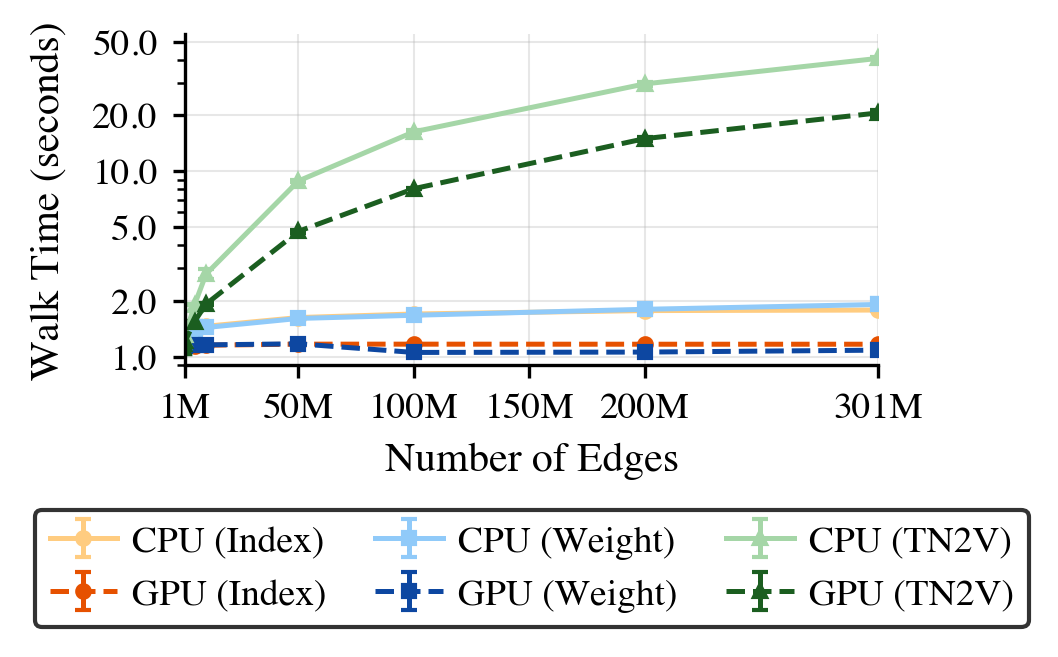

In [84]:
from matplotlib.ticker import LogLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os

# ------------------------------------------------------------
# Setup
# ------------------------------------------------------------
os.makedirs("figures", exist_ok=True)

plt.rcParams.update({
    "font.family": "serif",
    'font.size': 9,
    'axes.labelsize': 10,
    'axes.titlesize': 10,
    'xtick.labelsize': 9,
    'ytick.labelsize': 9,
    'legend.fontsize': 9,
    "text.usetex": False,
    "figure.dpi": 300,
    "savefig.dpi": 300
})

# Method-based color pairs (CPU light / GPU dark)
colors = {
    "index_cpu": "#FFCC80",  # Light Orange
    "index_gpu":  "#E65100",  # Dark Orange

    "weight_cpu": "#90CAF9", # Light Blue
    "weight_gpu":  "#0D47A1", # Dark Blue

    "tn2v_cpu":   "#A5D6A7", # Light Green
    "tn2v_gpu":    "#1B5E20", # Dark Green
}

def create_clean_axis(ax):
    ax.grid(True, alpha=0.3, linewidth=0.5)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_linewidth(0.8)
    ax.spines["bottom"].set_linewidth(0.8)
    ax.tick_params(direction="out", length=3, width=0.8)

def compute_mean_std(runs_per_x):
    arr = np.asarray(runs_per_x, dtype=float)
    return arr.mean(axis=1), arr.std(axis=1)

# ------------------------------------------------------------
# Load results
# ------------------------------------------------------------
results_path = "results/results_walk_time_vs_edges_10M_simple.pkl"
res = pickle.load(open(results_path, "rb"))

edge_counts = np.array([
    1_000,
    5_000,
    10_000,
    50_000,
    100_000,
    500_000,
    1_000_000,
    5_000_000,
    10_000_000,
    50_000_000,
    100_000_000,
    200_000_000,
    301_183_000
], dtype=float)

cpu_mean_index, cpu_std_index = compute_mean_std(res["walk_time_cpu_index"])
cpu_mean_weight, cpu_std_weight = compute_mean_std(res["walk_time_cpu_weight"])
cpu_mean_tn2v,  cpu_std_tn2v  = compute_mean_std(res["walk_time_cpu_tn2v"])

gpu_mean_index, gpu_std_index = compute_mean_std(res["walk_time_gpu_index"])
gpu_mean_weight, gpu_std_weight = compute_mean_std(res["walk_time_gpu_weight"])
gpu_mean_tn2v,  gpu_std_tn2v  = compute_mean_std(res["walk_time_gpu_tn2v"])

# ------------------------------------------------------------
# Plot
# ------------------------------------------------------------
fig, ax = plt.subplots(figsize=(3.3, 2.3))

# Index
ax.errorbar(edge_counts, cpu_mean_index, yerr=cpu_std_index,
            fmt="o-", color=colors["index_cpu"],
            label="CPU (Index)", markersize=3, linewidth=1.2, capsize=2)

ax.errorbar(edge_counts, gpu_mean_index, yerr=gpu_std_index,
            fmt="o--", color=colors["index_gpu"],
            label="GPU (Index)", markersize=3, linewidth=1.2, capsize=2)

# Weight
ax.errorbar(edge_counts, cpu_mean_weight, yerr=cpu_std_weight,
            fmt="s-", color=colors["weight_cpu"],
            label="CPU (Weight)", markersize=3, linewidth=1.2, capsize=2)

ax.errorbar(edge_counts, gpu_mean_weight, yerr=gpu_std_weight,
            fmt="s--", color=colors["weight_gpu"],
            label="GPU (Weight)", markersize=3, linewidth=1.2, capsize=2)

# TN2V
ax.errorbar(edge_counts, cpu_mean_tn2v, yerr=cpu_std_tn2v,
            fmt="^-", color=colors["tn2v_cpu"],
            label="CPU (TN2V)", markersize=3, linewidth=1.2, capsize=2)

ax.errorbar(edge_counts, gpu_mean_tn2v, yerr=gpu_std_tn2v,
            fmt="^--", color=colors["tn2v_gpu"],
            label="GPU (TN2V)", markersize=3, linewidth=1.2, capsize=2)

# Axes styling
ax.set_xlabel("Number of Edges")
ax.set_ylabel("Walk Time (seconds)", labelpad=6)
create_clean_axis(ax)

# X-axis ticks
ax.set_xticks([
    1_000_000,
    50_000_000,
    100_000_000,
    150_000_000,
    200_000_000,
    301_183_000
])
ax.set_xticklabels(["1M", "50M", "100M", "150M", "200M", "301M"])
ax.set_xlim(1_000_000, 301_183_000)

# Y-axis: log scale with more ticks
ax.set_yscale("log")

# Ensure top tick (50) is visible
ax.set_ylim(0.9, 55)

# Major ticks at 1, 2, 5, 10, 20, 50
ax.yaxis.set_major_locator(
    LogLocator(base=10, subs=(1.0, 2.0, 5.0), numticks=12)
)

# Minor ticks for readability (no labels)
ax.yaxis.set_minor_locator(
    LogLocator(base=10, subs=np.arange(1, 10) * 0.1, numticks=12)
)

# Clean formatting for major tick labels
ax.yaxis.set_major_formatter(FormatStrFormatter("%.1f"))

# Explicit legend ordering: group by method
handles, labels = ax.get_legend_handles_labels()

legend_order = [
    "CPU (Index)", "GPU (Index)",
    "CPU (Weight)", "GPU (Weight)",
    "CPU (TN2V)", "GPU (TN2V)",
]

ordered_handles = [handles[labels.index(lbl)] for lbl in legend_order]
ordered_labels  = legend_order

# Legend below
ax.legend(
    ordered_handles,
    ordered_labels,
    loc="upper center",
    bbox_to_anchor=(0.5, -0.38),
    ncol=3,
    frameon=True,
    edgecolor="black",
    columnspacing=1.3,
    handlelength=1.8
)

fig.subplots_adjust(left=0.20, bottom=0.40)

# Save
plt.savefig("figures/plot_14_walk_time_vs_edges_with_tn2v.pdf")
plt.savefig("figures/plot_14_walk_time_vs_edges_with_tn2v.png")
plt.show()


In [72]:
res

{'walk_time_cpu_tn2v': [[1.1970584392547607,
   1.1871557235717773,
   1.1915168762207031,
   1.1781573295593262,
   1.1932337284088135],
  [1.2085859775543213,
   1.199538230895996,
   1.2033421993255615,
   1.2146060466766357,
   1.2066717147827148],
  [1.2016708850860596,
   1.2080578804016113,
   1.2156641483306885,
   1.1830174922943115,
   1.210265874862671],
  [1.2022528648376465,
   1.2131903171539307,
   1.2366015911102295,
   1.2340538501739502,
   1.2413785457611084],
  [1.211693525314331,
   1.2024788856506348,
   1.2579381465911865,
   1.257077932357788,
   1.209873914718628],
  [1.250638723373413,
   1.2549700736999512,
   1.248572587966919,
   1.2527332305908203,
   1.2516541481018066],
  [1.3028144836425781,
   1.3427941799163818,
   1.3030495643615723,
   1.3044395446777344,
   1.3087773323059082],
  [1.9046783447265625,
   1.9205994606018066,
   1.885545015335083,
   1.891937494277954,
   1.9189567565917969],
  [3.1306328773498535,
   2.7050695419311523,
   2.68761634